# Ковариация и корреляция

In [1]:
import pandas as pd 
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [76]:
# Задаем даты анализируемого периода
start = dt.datetime(2022, 2, 24) # (2022, 2, 24)
end = dt.datetime(2023, 12, 28) # (2022, 2, 24)

In [77]:
# Составляем пакет акций
stocks = {"Google":"GOOG",
          "Pfizer":"PFE",
          "Boeing":"BA",
          "Ford":"F",
          "Volkswagen":"VWAGY",
          "Micron":"MU",
          "TSMC":"TSM",
          "Texas Instruments":"TXN",
          "Qualcomm":"QCOM",
          "NVidia":"NVDA"
         }

In [78]:
# Делаем список тикеров акций 
tickers = list(stocks.values())
tickers

['GOOG', 'PFE', 'BA', 'F', 'VWAGY', 'MU', 'TSM', 'TXN', 'QCOM', 'NVDA']

In [79]:
# формируем исторические данные по нашему портфелю
portfolio =  pdr.get_data_yahoo(tickers,
                                    start, 
                                    end)['Adj Close'] # Выбираем только значения по закрытию торгов
portfolio = portfolio.astype('float')
portfolio.head() 

[*********************100%***********************]  10 of 10 completed


,BA,F,GOOG,MU,NVDA,PFE,QCOM,TSM,TXN,VWAGY
Date,,,,,,,,,,
2022-02-24,198.429993,15.107613,132.673492,87.659187,237.152908,42.906036,160.144150,107.427940,160.967667,20.967346
2022-02-25,201.479996,15.706632,134.519501,88.912437,241.237259,44.549091,162.956528,106.803825,162.135147,22.032524
2022-02-28,205.339996,15.468786,134.891006,87.688789,243.514160,43.820911,163.967117,102.751732,161.347336,20.890396
2022-03-01,194.910004,14.711205,134.167999,85.123070,234.446655,42.709988,156.054260,103.750359,158.784592,19.521465
2022-03-02,197.809998,15.944479,134.751495,92.070274,241.907608,44.530411,162.028030,105.248276,161.451736,19.703718


In [80]:
portfolio.shape

(461, 10)

In [81]:
portfolio.dtypes

BA       float64
F        float64
GOOG     float64
MU       float64
NVDA     float64
PFE      float64
QCOM     float64
TSM      float64
TXN      float64
VWAGY    float64
dtype: object

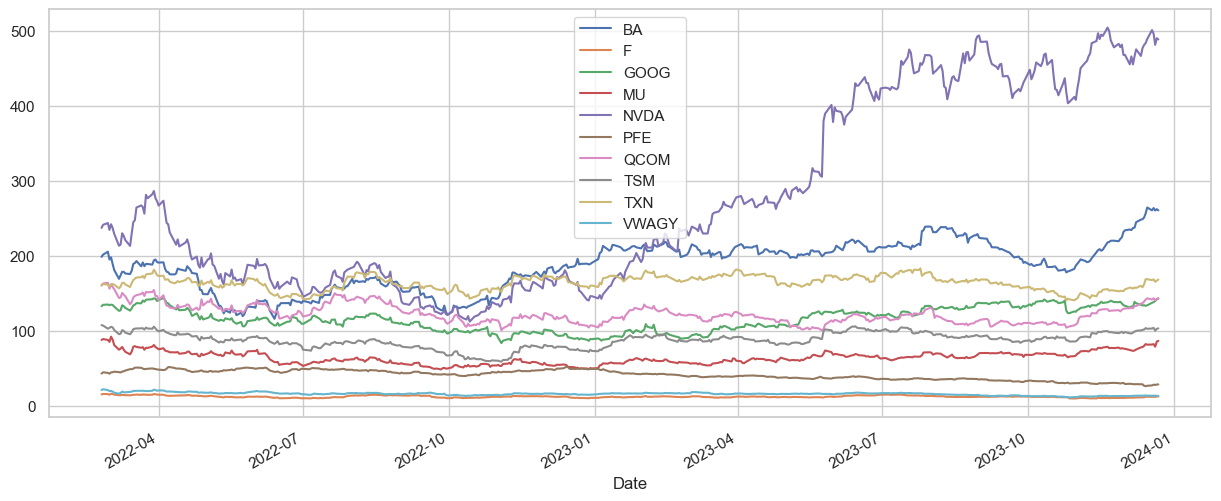

In [82]:
portfolio.plot(figsize=(15,6))
plt.show()

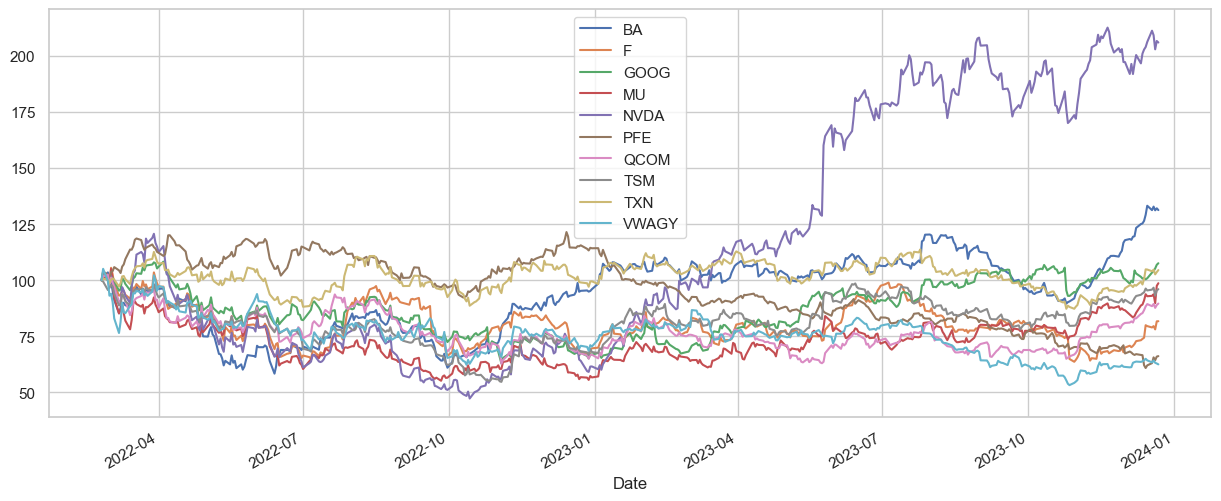

In [83]:
(portfolio / portfolio.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

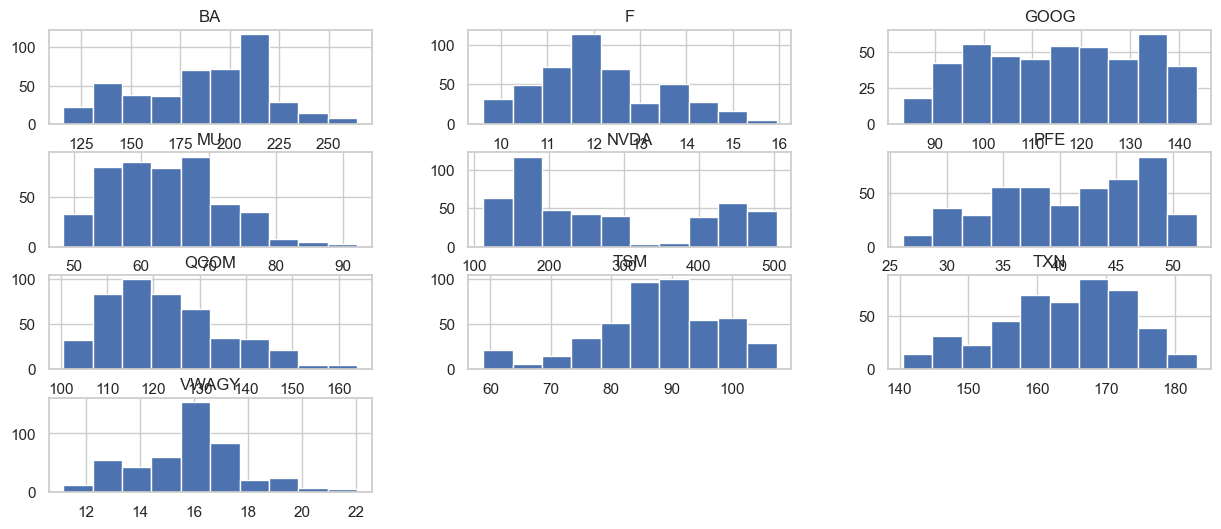

In [84]:
portfolio.hist(figsize=(15,6))
plt.show()

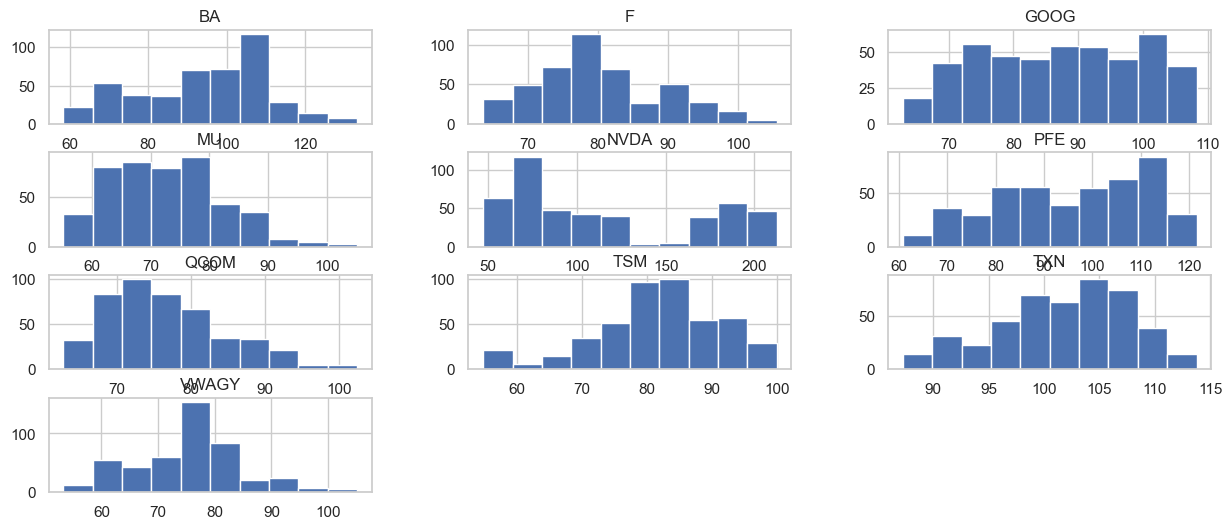

In [85]:
(portfolio / portfolio.iloc[0] * 100).hist(figsize = (15, 6));

In [86]:
#  создаем таблицу относительныхдоходностей
returns = (portfolio / portfolio.shift(1)) - 1  # 0+/-
#  смотрим, что по "краям"
returns.iloc[[0,1,-2,-1]]

,BA,F,GOOG,MU,NVDA,PFE,QCOM,TSM,TXN,VWAGY
Date,,,,,,,,,,
2022-02-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-25,0.015371,0.039650,0.013914,0.014297,0.017222,0.038294,0.017562,-0.005810,0.007253,0.050802
2023-12-21,0.006801,0.045763,0.015323,0.086288,0.018270,0.024611,0.014241,0.025090,0.009868,-0.004979
2023-12-22,-0.006030,0.000810,0.006488,0.011816,-0.003266,0.003179,0.007372,0.005851,0.008573,-0.006065


In [87]:
# Удаляем незаполненную (первую) строку
returns.dropna(inplace = True) 
returns

,BA,F,GOOG,MU,NVDA,PFE,QCOM,TSM,TXN,VWAGY
Date,,,,,,,,,,
2022-02-25,0.015371,0.039650,0.013914,0.014297,0.017222,0.038294,0.017562,-0.005810,0.007253,0.050802
2022-02-28,0.019158,-0.015143,0.002762,-0.013762,0.009438,-0.016346,0.006202,-0.037940,-0.004859,-0.051838
2022-03-01,-0.050794,-0.048975,-0.005360,-0.029259,-0.037236,-0.025351,-0.048259,0.009719,-0.015883,-0.065529
2022-03-02,0.014879,0.083832,0.004349,0.081614,0.031824,0.042623,0.038280,0.014438,0.016797,0.009336
2022-03-03,-0.045296,-0.027624,-0.003291,-0.044159,-0.020892,0.002726,-0.023043,-0.007481,0.005291,-0.039260
...,...,...,...,...,...,...,...,...,...,...
2023-12-18,-0.014606,-0.007488,0.025030,0.001842,0.024279,0.016147,-0.010340,0.003803,-0.007234,-0.013353
2023-12-19,0.011904,0.007544,0.006633,0.007479,-0.009445,0.040650,0.011154,0.009132,0.006451,0.012782
2023-12-20,-0.012371,-0.018303,0.011296,-0.042351,-0.030098,-0.018821,-0.019479,-0.036873,-0.019703,-0.015887


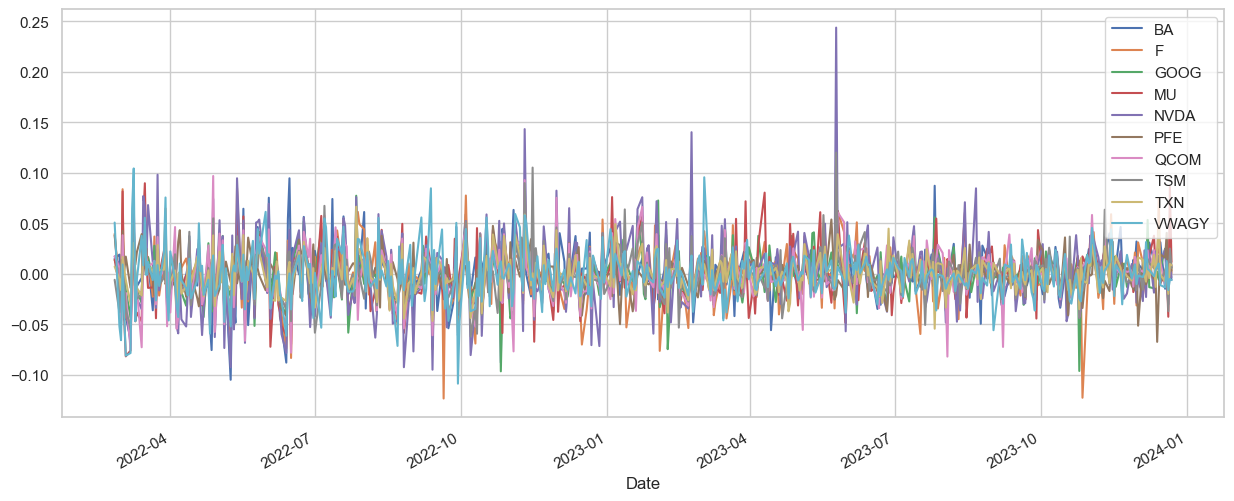

In [88]:
returns.plot(figsize = (15, 6));

In [89]:
# Годовые доходности
annual_returns = returns.mean() * portfolio.shape[0] # mean in period
annual_returns

BA       0.407200
F       -0.044069
GOOG     0.185022
MU       0.148766
NVDA     1.006479
PFE     -0.356340
QCOM     0.030657
TSM      0.069673
TXN      0.113969
VWAGY   -0.331316
dtype: float64

In [90]:
# Строим матрицу ковариаций
cov_matrix_a = returns.cov() * portfolio.shape[0]
cov_matrix_a

,BA,F,GOOG,MU,NVDA,PFE,QCOM,TSM,TXN,VWAGY
BA,0.268731,0.151105,0.107097,0.138227,0.192269,0.032211,0.124624,0.104838,0.091099,0.133200
F,0.151105,0.313723,0.116791,0.172517,0.214473,0.045204,0.156797,0.127267,0.121002,0.169597
GOOG,0.107097,0.116791,0.223674,0.146828,0.225407,0.035423,0.142097,0.124370,0.102859,0.104867
MU,0.138227,0.172517,0.146828,0.326325,0.287189,0.033969,0.206098,0.168150,0.144035,0.134497
NVDA,0.192269,0.214473,0.225407,0.287189,0.576142,0.044507,0.266561,0.263232,0.186873,0.177714
PFE,0.032211,0.045204,0.035423,0.033969,0.044507,0.114192,0.039617,0.020500,0.036255,0.037701
QCOM,0.124624,0.156797,0.142097,0.206098,0.266561,0.039617,0.281486,0.172798,0.147764,0.128261
TSM,0.104838,0.127267,0.124370,0.168150,0.263232,0.020500,0.172798,0.223570,0.117484,0.121756
TXN,0.091099,0.121002,0.102859,0.144035,0.186873,0.036255,0.147764,0.117484,0.139998,0.096142
VWAGY,0.133200,0.169597,0.104867,0.134497,0.177714,0.037701,0.128261,0.121756,0.096142,0.279118


In [91]:
# Логарифмируем для нормализации распределений и выравнпивания дисперсий
cov_matrix_LOG = np.log(portfolio / portfolio.shift(1)).cov() * portfolio.shape[0]
cov_matrix_LOG

,BA,F,GOOG,MU,NVDA,PFE,QCOM,TSM,TXN,VWAGY
BA,0.270334,0.151845,0.108363,0.139006,0.193756,0.032558,0.125320,0.105225,0.091415,0.134986
F,0.151845,0.318023,0.116695,0.172270,0.215055,0.046013,0.157440,0.126999,0.120384,0.170483
GOOG,0.108363,0.116695,0.224549,0.146786,0.224117,0.035364,0.142140,0.123626,0.102816,0.104712
MU,0.139006,0.172270,0.146786,0.324688,0.284544,0.033737,0.205758,0.167064,0.143279,0.135619
NVDA,0.193756,0.215055,0.224117,0.284544,0.560405,0.045255,0.265221,0.257065,0.185358,0.178391
PFE,0.032558,0.046013,0.035364,0.033737,0.045255,0.114330,0.039658,0.020745,0.036171,0.037616
QCOM,0.125320,0.157440,0.142140,0.205758,0.265221,0.039658,0.282388,0.171638,0.147342,0.129043
TSM,0.105225,0.126999,0.123626,0.167064,0.257065,0.020745,0.171638,0.220225,0.116918,0.122072
TXN,0.091415,0.120384,0.102816,0.143279,0.185358,0.036171,0.147342,0.116918,0.139516,0.096085
VWAGY,0.134986,0.170483,0.104712,0.135619,0.178391,0.037616,0.129043,0.122072,0.096085,0.278790


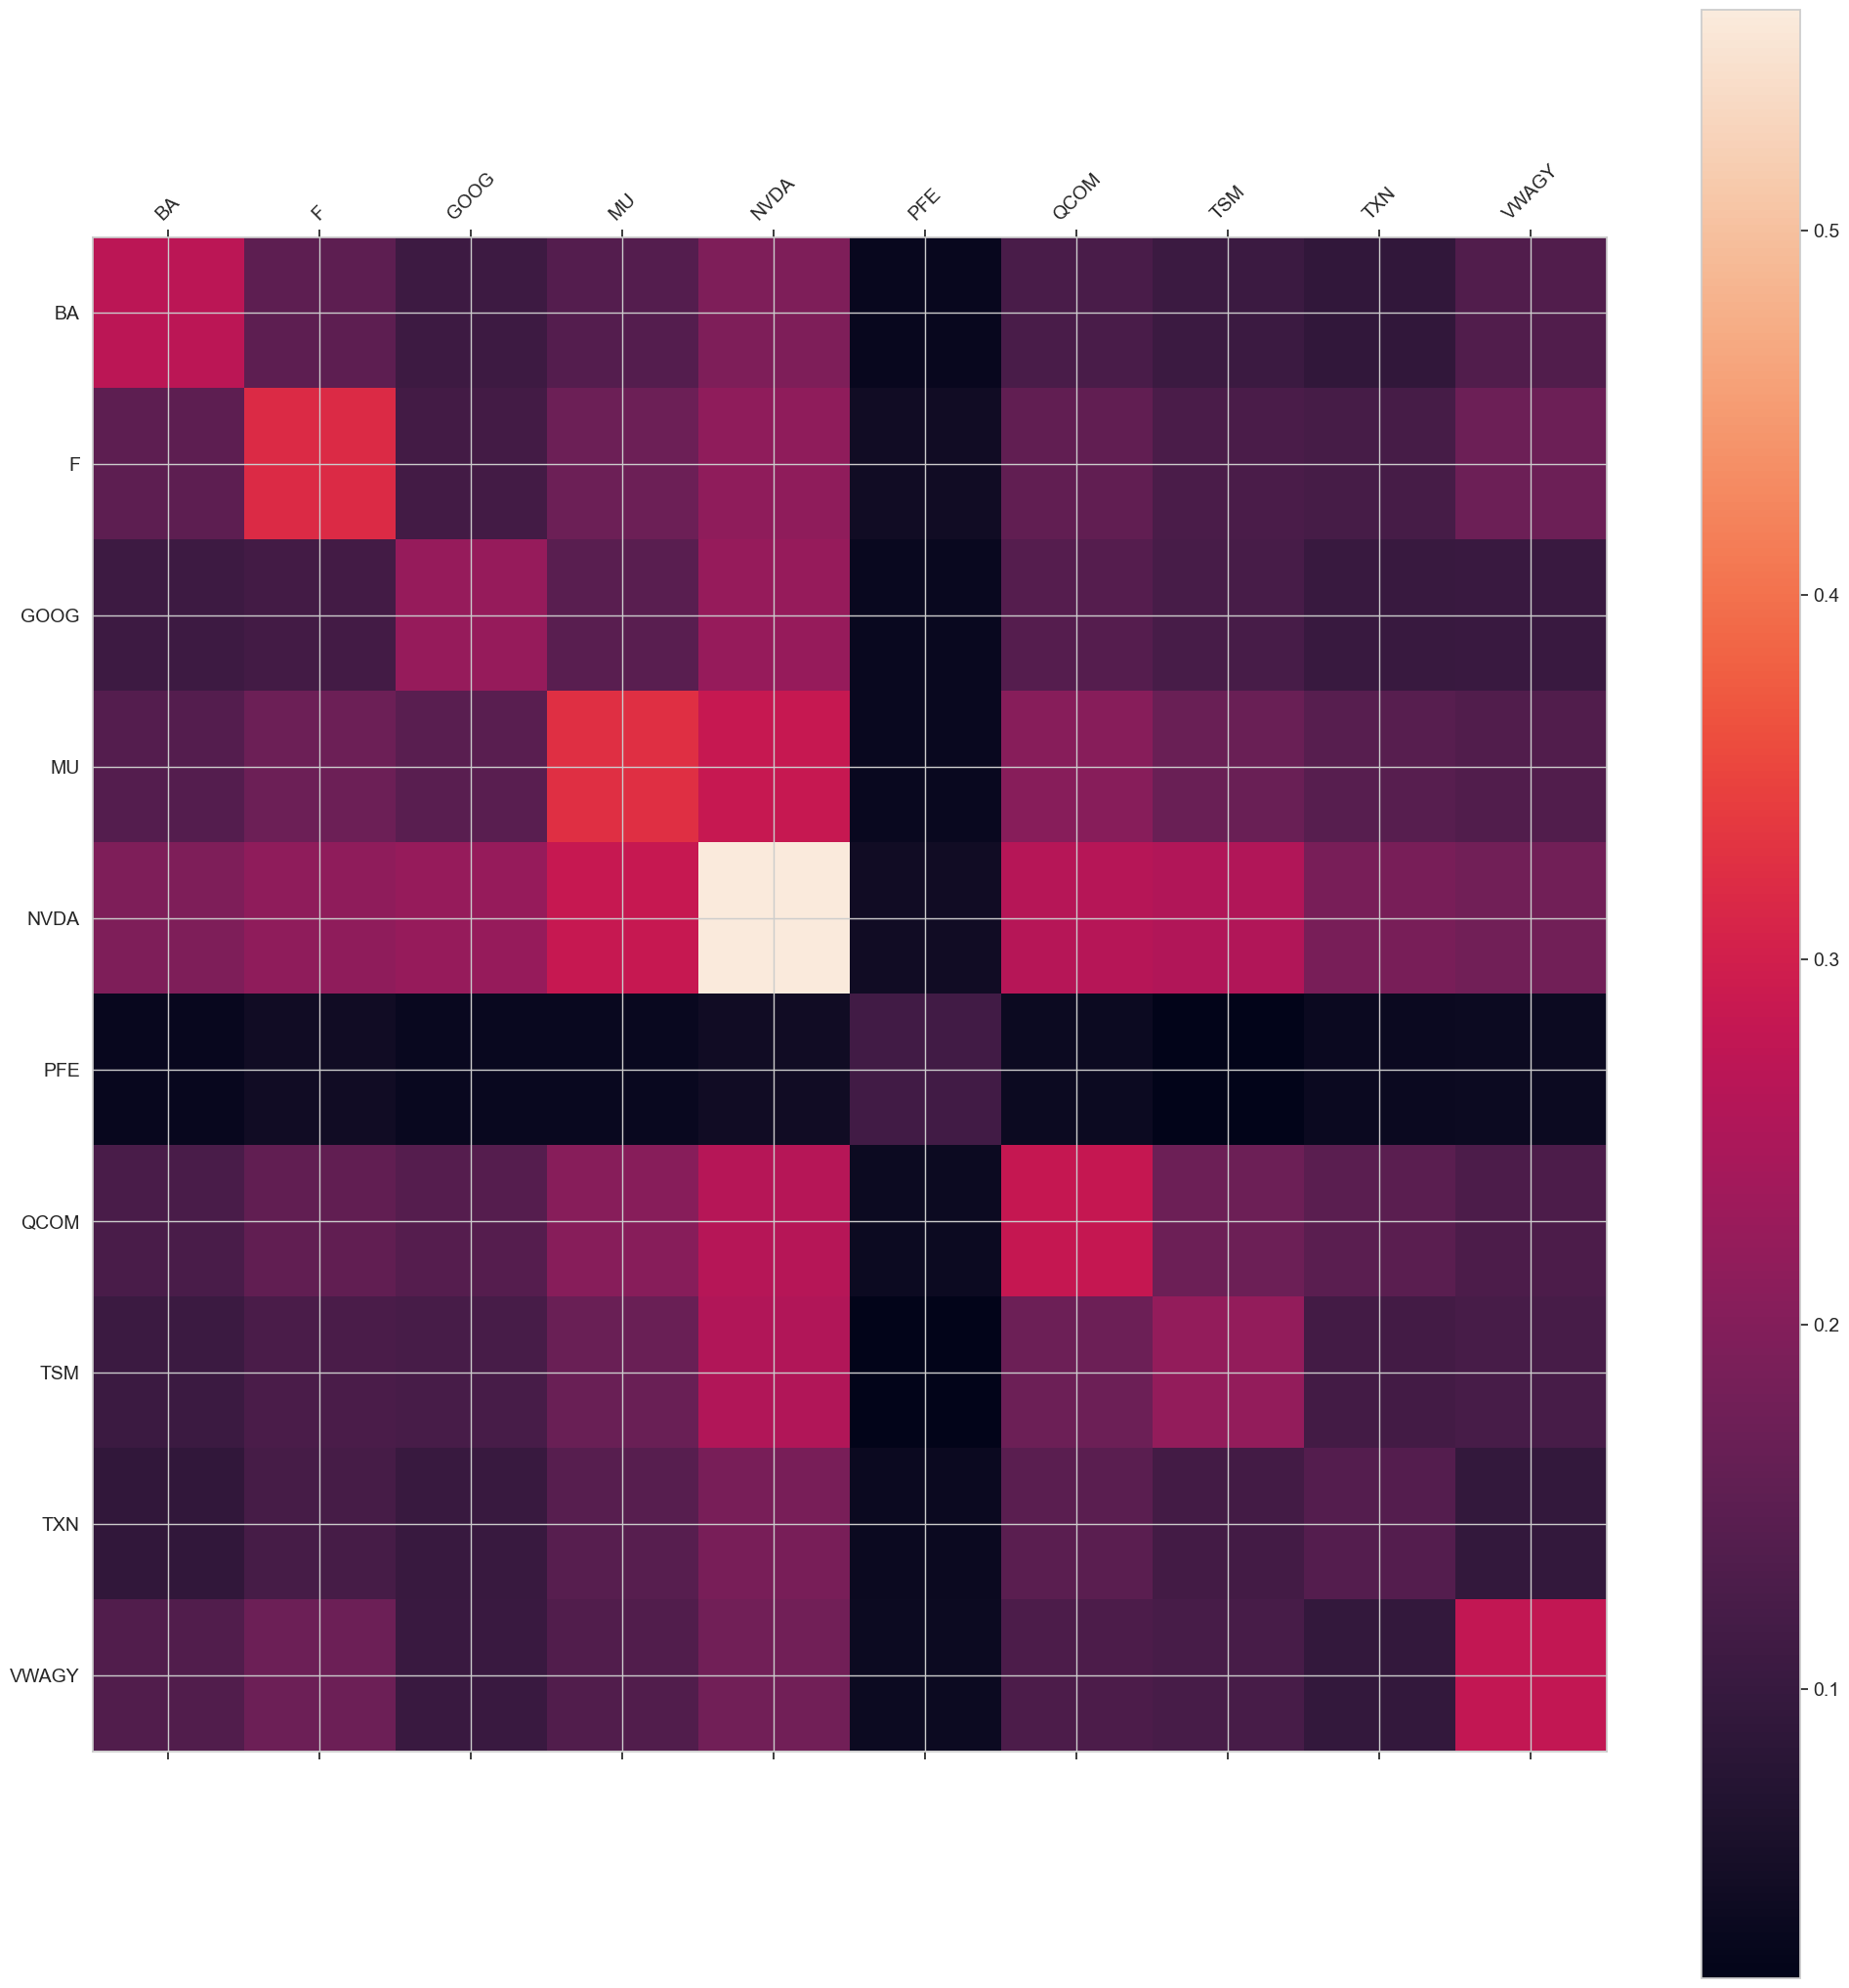

In [92]:
plt.figure(figsize=(25, 26))
plt.matshow(cov_matrix_LOG, fignum=1) #annot=True
plt.xticks(range(cov_matrix_LOG.shape[1]), cov_matrix_LOG.columns, fontsize=14, rotation=45)
plt.yticks(range(cov_matrix_LOG.shape[1]), cov_matrix_LOG.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.show()

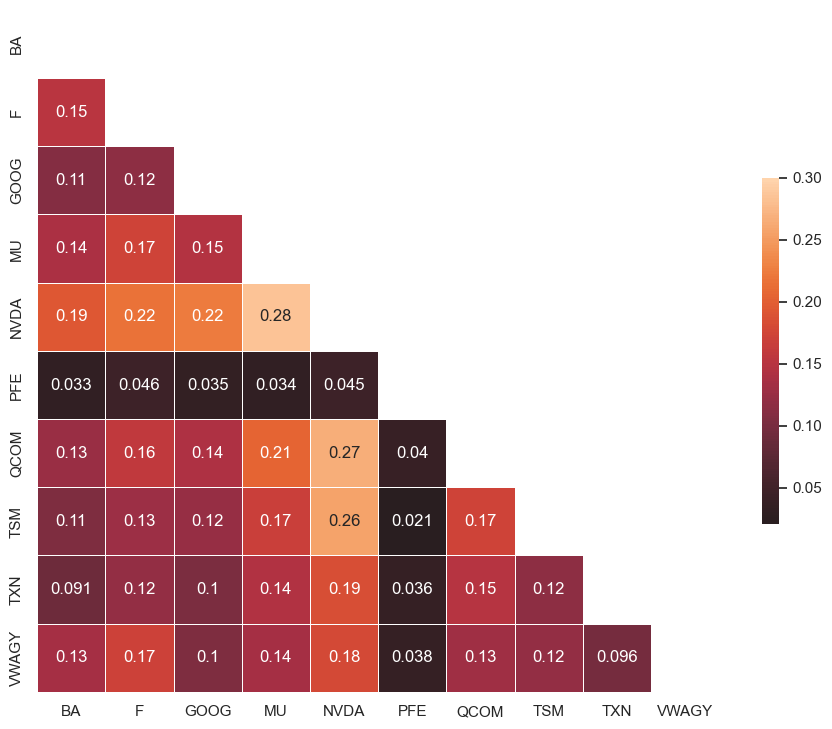

In [93]:
sns.set(style="whitegrid")
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(cov_matrix_LOG, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cov_matrix_LOG, mask=mask,  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True,);

<span style="color:blue"> Обратите внимание, как доходности акций из разных отраслей ковариирую между собой и как меняется ковариация в разные исторические периоды </span>


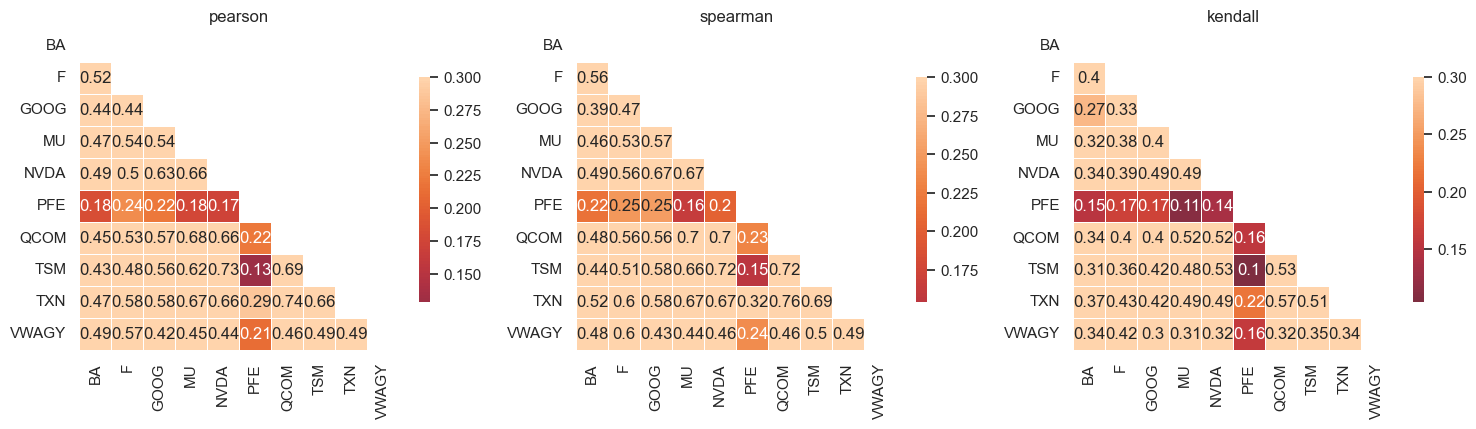

In [94]:
# А что показывает корреляция? 

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
sns.set(style="whitegrid")
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(cov_matrix_LOG, dtype=np.bool))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)

for corr_type, ax in zip(('pearson', "spearman", 'kendall'),(ax1, ax2, ax3)):

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(returns.corr(method=corr_type), mask=mask,  vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, ax=ax)
    ax.set_title(corr_type)

plt.tight_layout()
plt.show();

In [95]:
# Корреляции с помощью numpy
## For Dimensionality Reduction
correlations = np.abs([np.corrcoef(returns["GOOG"],returns[col_name])[0,1] for col_name in tickers[1:]])
print (list(zip(tickers[1:],correlations)))

[('PFE', 0.22164457307480281), ('BA', 0.4368263151442742), ('F', 0.44088807977409533), ('VWAGY', 0.41969765286035493), ('MU', 0.5434719880365589), ('TSM', 0.5561612882012535), ('TXN', 0.5812639346263058), ('QCOM', 0.5663023411822659), ('NVDA', 0.6279063378725834)]


In [96]:
# Не сильно связаны!
correlations[correlations < .8]

array([0.22164457, 0.43682632, 0.44088808, 0.41969765, 0.54347199,
       0.55616129, 0.58126393, 0.56630234, 0.62790634])

In [97]:
# Выборка из 2х акций с разными типами корреляций
goog_ba = pd.DataFrame(columns = ('pearson', "spearman", 'kendall'))
for corr_type in goog_ba.columns:
       goog_ba[corr_type] = [returns['GOOG'].corr(other=returns["BA"], method=corr_type)] 
goog_ba

,pearson,spearman,kendall
0,0.436826,0.393255,0.274264


In [98]:
# простой способ
[returns['GOOG'].corr(other=returns["BA"])]

[0.4368263151442742]

In [99]:
# доверительный интервал
returns['GOOG'].sem() 

0.001027018347399521

In [100]:
# средняя доходность
returns['GOOG'].mean() 

0.0004013498495313116

<AxesSubplot:>

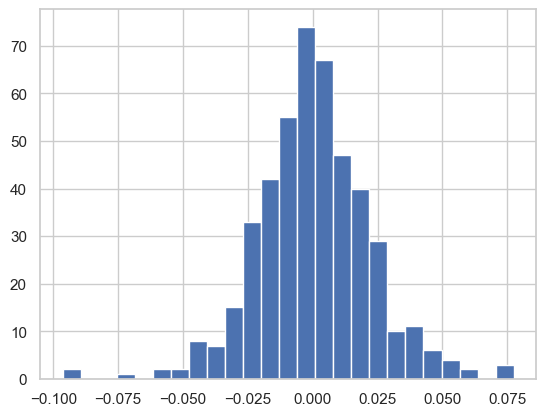

In [101]:
# доходность GOOG на графике
returns['GOOG'].hist(bins=25)